In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv('product k.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_k= df.drop(['Product Name','Product Category','Month','Year','Market Size', 'Marketing Expense','Month No.'],axis=1)

In [4]:
sales_k.shape

(60, 1)

In [5]:
sales_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [6]:
sales_k['Sales'].sum()

32299304

Text(0.5, 1.0, 'Product K')

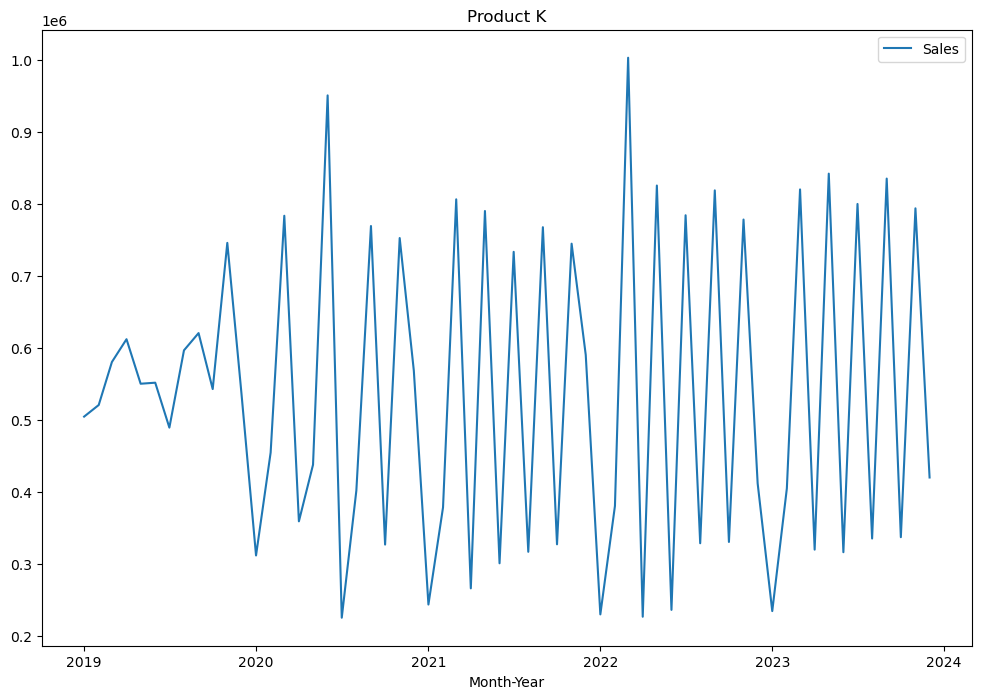

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_k)
plt.title('Product K')

In [8]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adf_test(sales_k)

ADF Statistics: -4.339743021722731
p- value: 0.0003788479952270515
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


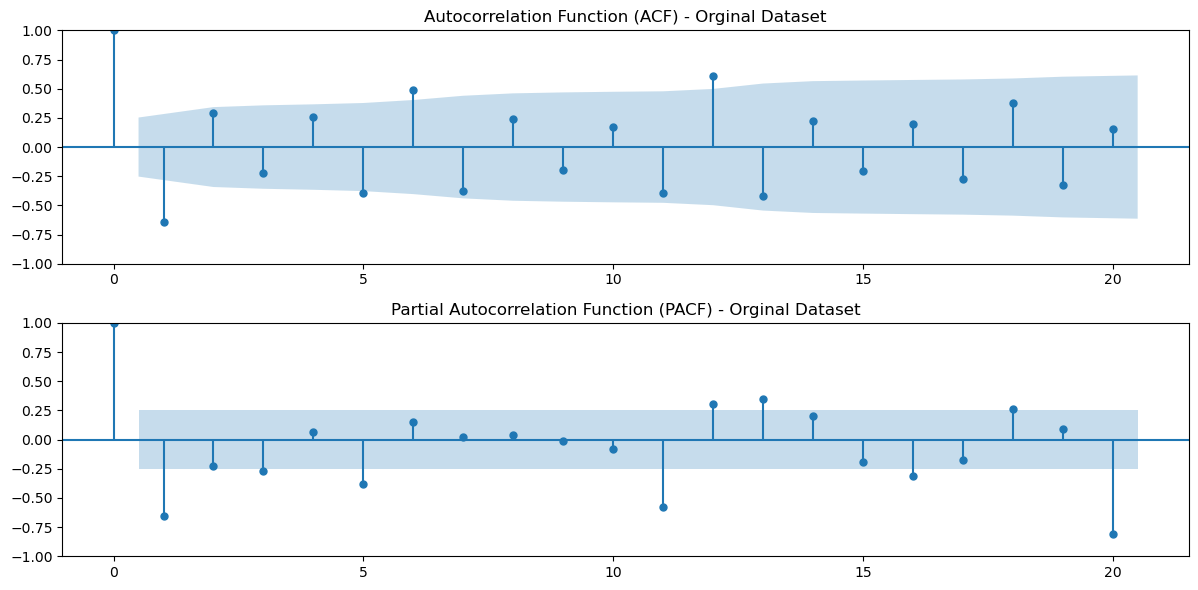

In [10]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_k, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [11]:
train= sales_k[:57]
test=sales_k[57:]

In [12]:
len(train)

57

In [13]:
#the combination p=(0,1,2,3,4,5) d=0 q=(0,1,2,3,4) must be tested with accuracy metrics and aic

In [14]:
#param = [(0,0,0),(0,0,1),(0,0,2),(0,0,3),(0,0,4),(1,0,0),(1,0,1),(1,0,2),(1,0,3),(1,0,4),(2,0,0), (2,0,1), (2,0,2),(2,0,3),(2,0,4),(3,0,0),(3,0,1),(3,0,2),(3,0,3),(3,0,4),(4,0,0),(4,0,1),(4,0,2),(4,0,3),(4,0,4),(5,0,0),(5,0,1),(5,0,2),(5,0,3),(5,0,4)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    # Calculate MAPE manually
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [15]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_i, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q))
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_k)-1))
        mae = mean_absolute_error(test, pred)
        mape = np.mean(np.abs((test - pred) / test)) * 100
        mse=mean_squared_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [16]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
6   1  2  1533.507379  1543.722636   66997.499604  4.710207e+09   68630.949204
23  5  3  1533.991987  1554.422500   69852.255675  5.652461e+09   75182.852461
10  2  2  1535.011025  1547.269333   67493.673017  4.749536e+09   68916.875095
20  5  0  1535.371761  1549.673120   67127.897649  4.855897e+09   69684.263143
7   1  3  1535.862384  1548.120691   67097.469041  4.738191e+09   68834.515974
21  5  1  1536.146476  1552.490886   60748.303542  4.120016e+09   64187.349499
14  3  2  1536.348627  1550.649986   62483.992335  4.191077e+09   64738.531040
15  3  3  1536.583045  1552.927455   61560.242946  7.023441e+09   83805.970548
18  4  2  1537.282512  1553.626923   61314.847979  4.093992e+09   63984.314202
5   1  1  1537.574512  1545.746717  100914.806531  1.519326e+10  123260.955417
11  2  3  1537.587771  1551.889129   66475.476129  4.647347e+09   68171.449436
22  5  2  1537.607874  1555.995335   66227.796485  4

In [17]:
m_arima= ARIMA (train, order=(1,0,2))
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -761.754
Date:                Thu, 09 May 2024   AIC                           1533.507
Time:                        19:45:15   BIC                           1543.723
Sample:                    01-01-2019   HQIC                          1537.477
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.394e+05   7676.605     70.268      0.000    5.24e+05    5.54e+05
ar.L1         -0.9860      0.082    -11.958      0.000      -1.148      -0.824
ma.L1          0.2327      0.211      1.102      0.2

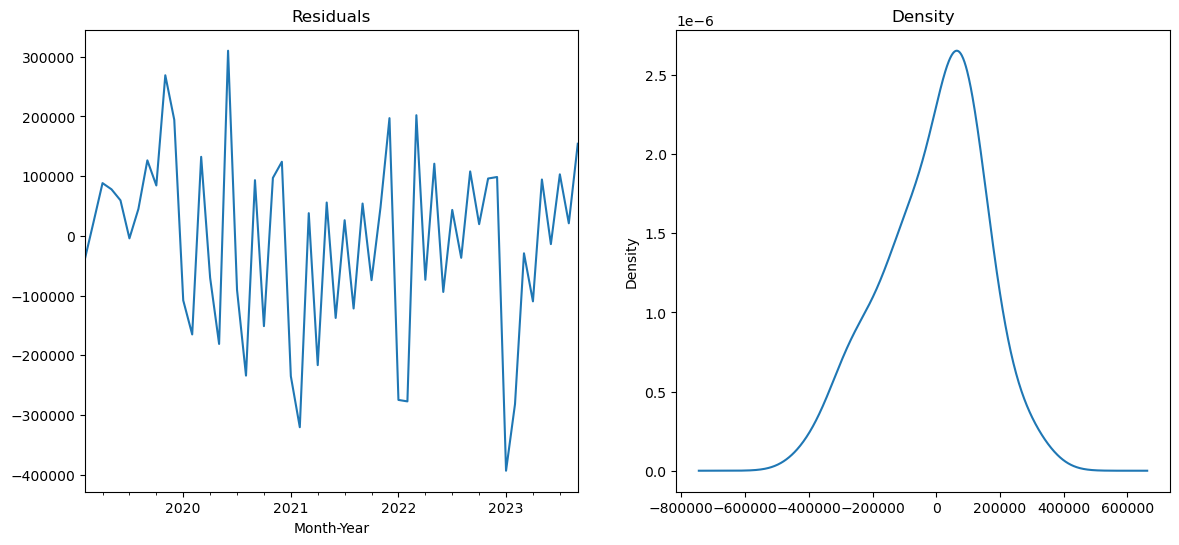

In [18]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

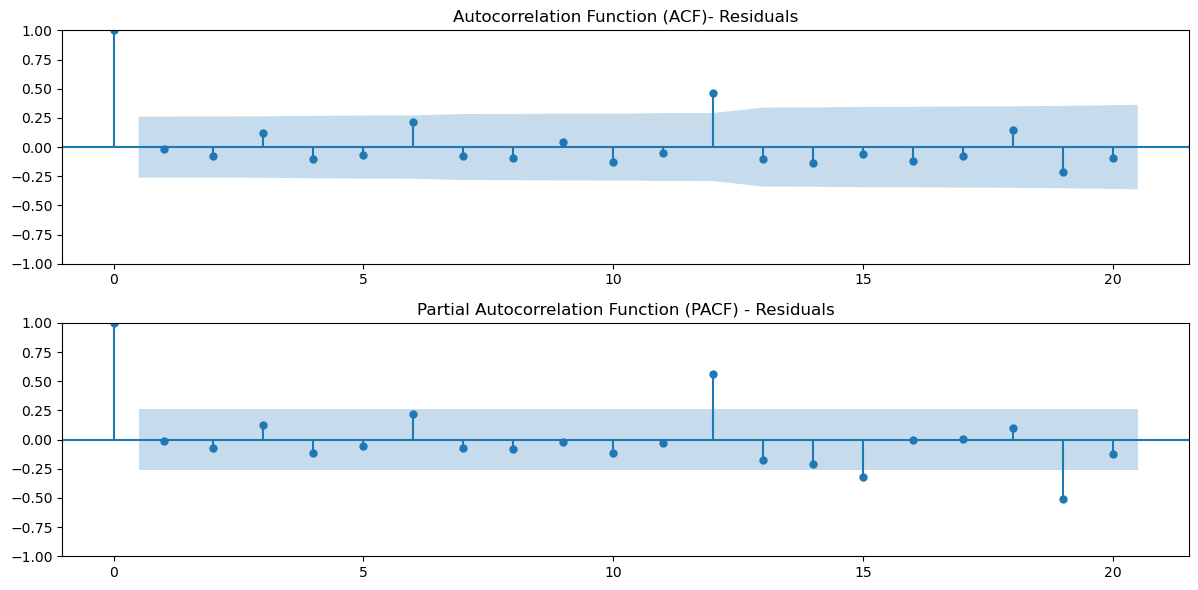

In [19]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

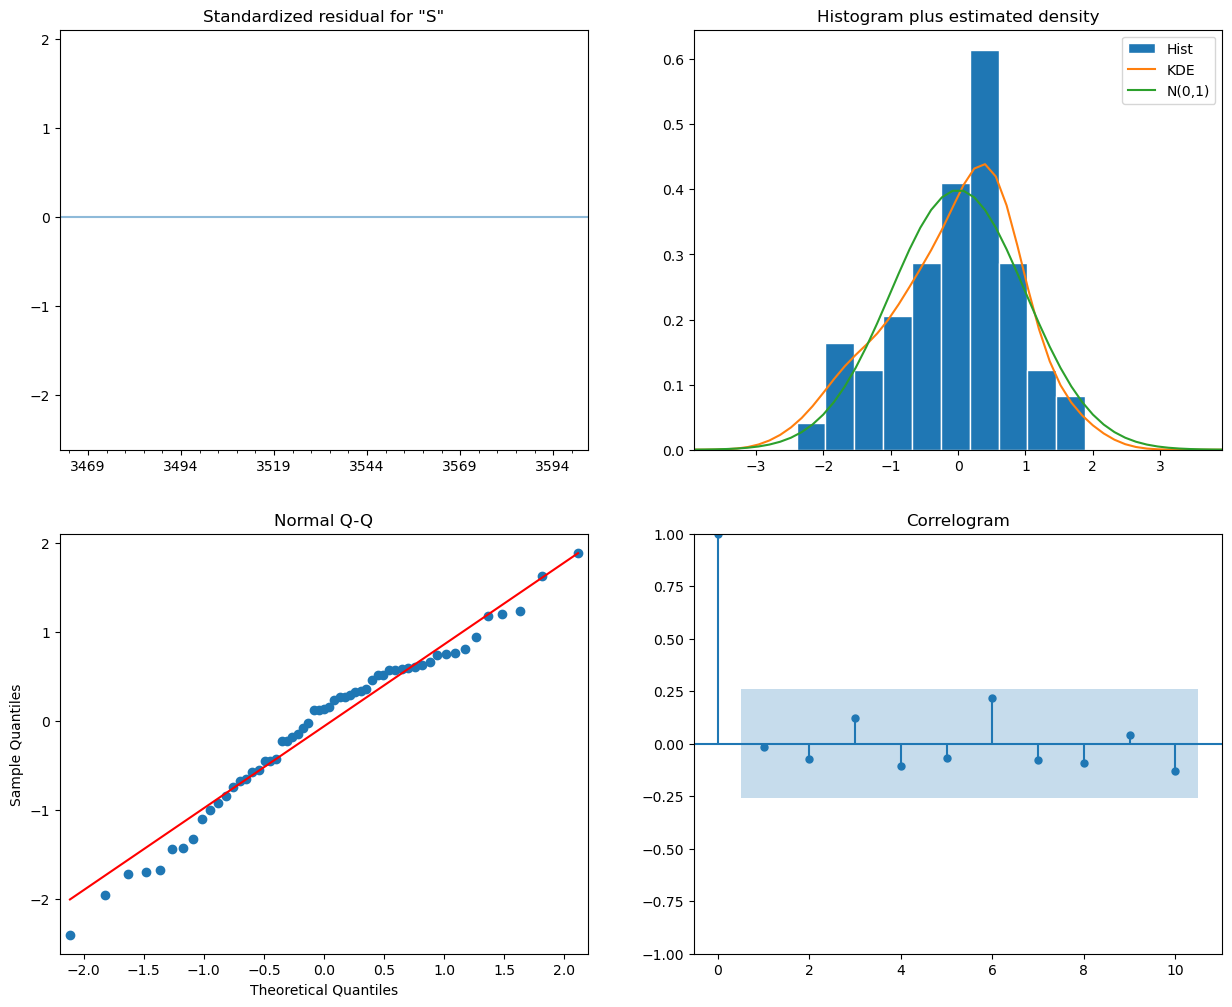

In [20]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [21]:
#pred=model.forecast(steps= len(test))
#sales_k['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_k.plot()

In [22]:
pred=model_arima.predict(start=len(train), end=(len(sales_k)-1), dynamic = True)
sales_k['Forecast_ARIMA']=[None]*len(train) + list(pred)

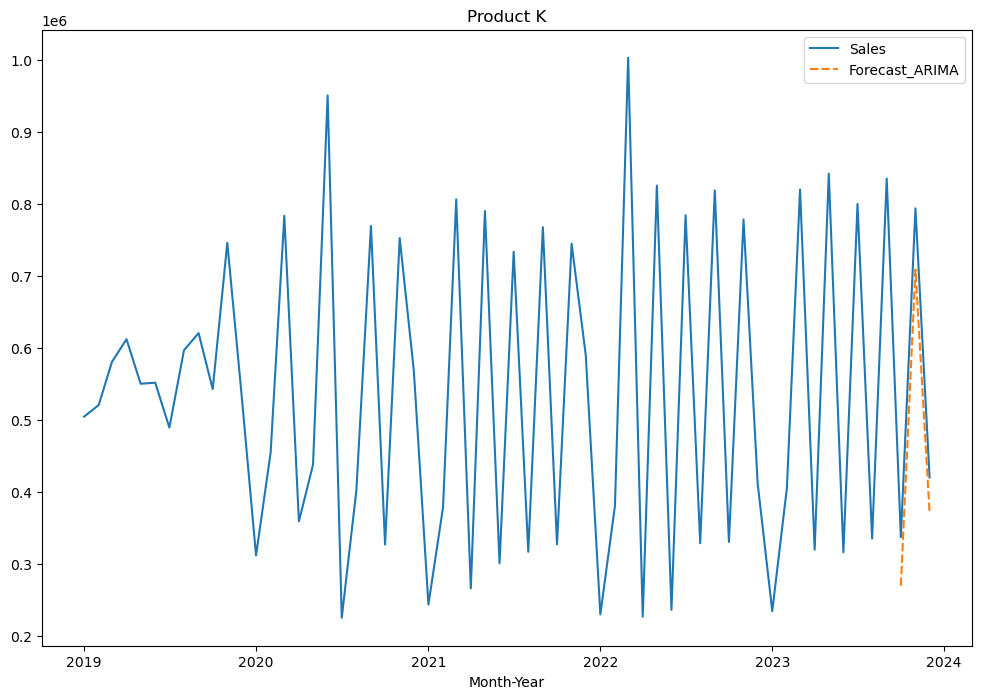

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k)
plt.title('Product K')
plt.show()

In [24]:
mae_arima= mean_absolute_error(test,pred)
mse_arima=mean_squared_error(test, pred)
mape_arima= mean_absolute_percentage_error(test,pred)
rmse_arima= np.sqrt(mean_squared_error(test,pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 66997.49960406007
MAPE - ARIMA: 0.1407512146293462
MSE - ARIMA: 4710207188.7102785
RMSE - ARIMA: 68630.94920449723


# SARIMA

In [25]:
import statsmodels.api as sm

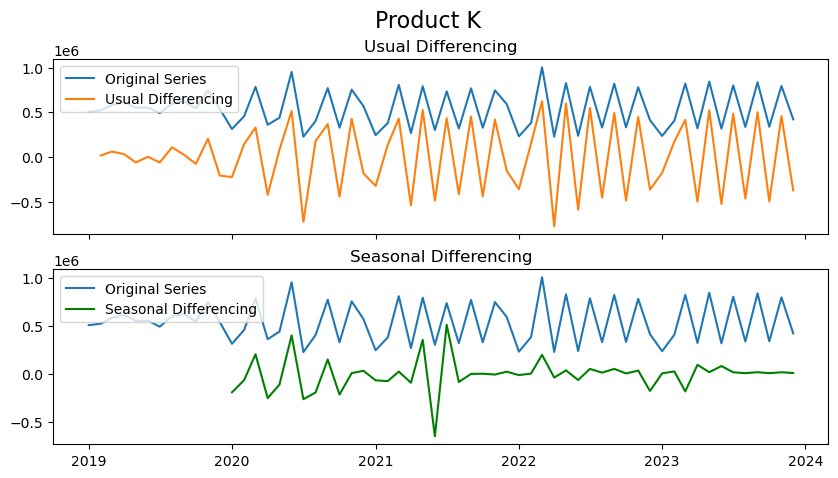

In [26]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_k['Sales'], label='Original Series')
axes[0].plot(sales_k['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_k['Sales'], label='Original Series')
axes[1].plot(sales_k['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product K', fontsize=16)
plt.show()

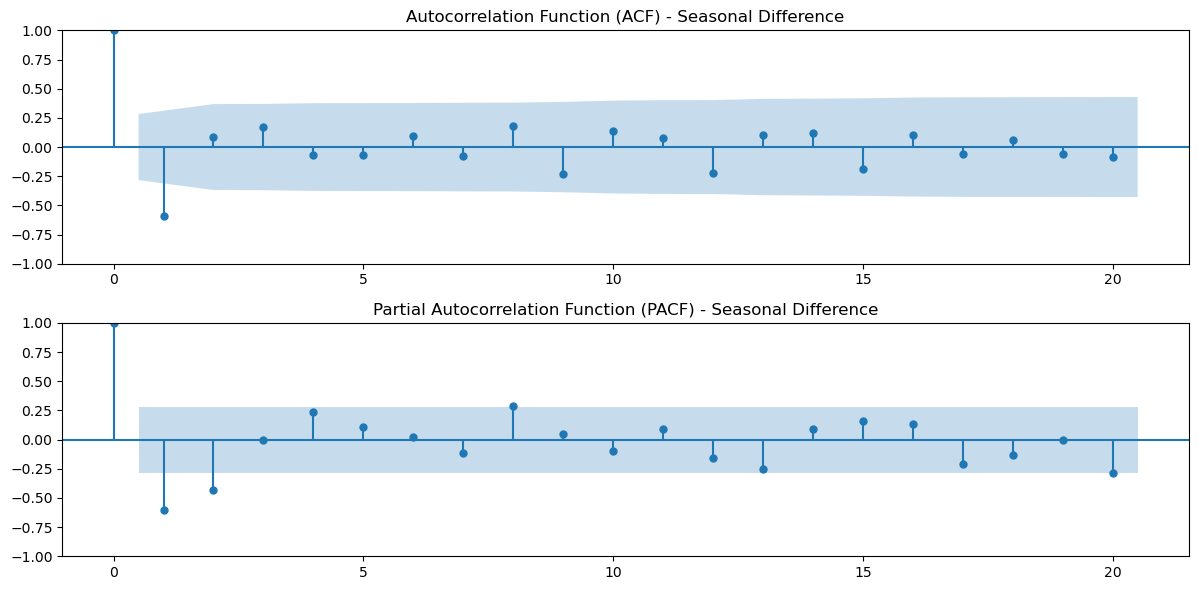

In [27]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

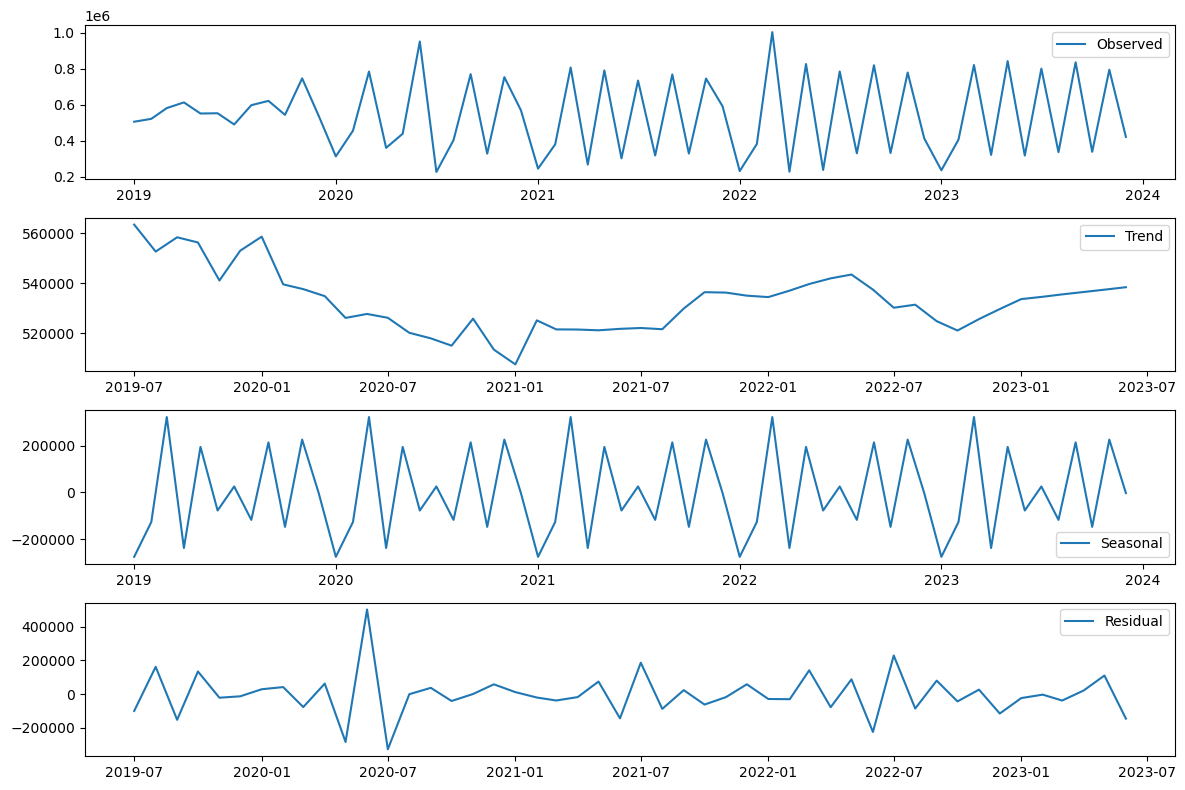

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_k['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [29]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1, 0, 2), seasonal_order=(P, 1, Q, 12))
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True)
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])

In [30]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q          aic          bic           mae           mse
1  0  1  1197.689691  1206.723003  11223.902115  1.307490e+08
2  1  0  1197.924662  1206.957975  11140.252469  1.299708e+08
4  2  0  1199.486426  1210.326401  11020.016775  1.258688e+08
3  1  1  1199.645491  1210.485466  11100.017800  1.288329e+08
6  3  0  1201.052250  1213.698887  12341.515289  1.585710e+08
5  2  1  1201.278021  1213.924659  12523.467649  1.840713e+08
0  0  0  1202.151126  1209.377776  10574.859819  1.138313e+08
7  3  1  1202.890906  1217.344206   6528.570779  8.555657e+07


In [31]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 0, 2),seasonal_order=(0,1,1,12))
sarima_model=sarima.fit()

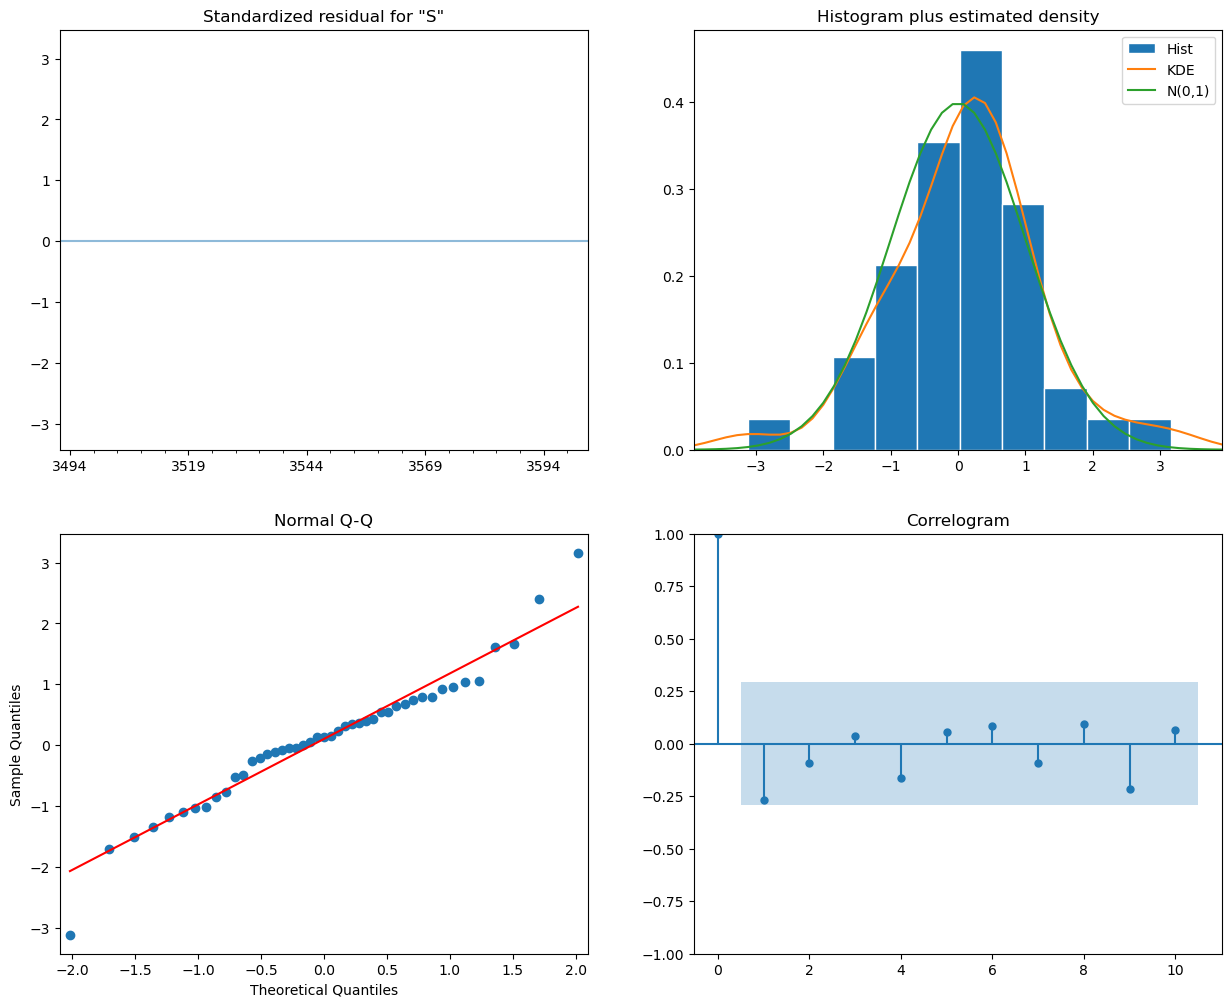

In [32]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
forecast_test_sarima=sarima_model.predict(start=57,end=59,dynamic=True)

In [34]:
sales_k['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product K')

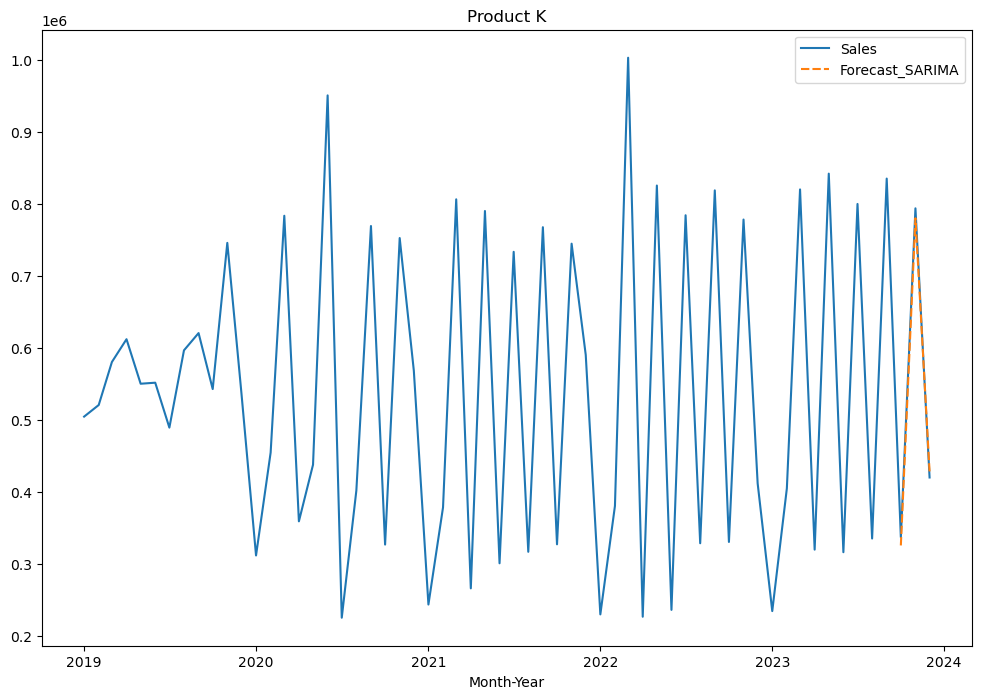

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_SARIMA']])
plt.title('Product K')

In [36]:
mae_sarima= mean_absolute_error(test,forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test,forecast_test_sarima)
mse_sarima=mean_squared_error(test, forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test,forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 11223.902
MAPE - SARIMA: 0.024
MSE - SARIMA: 130748998.863
RMSE - SARIMA: 11434.553


# AUTO-ARIMA

In [37]:
import pmdarima as pm

In [38]:
auto_arima= pm.auto_arima(train, start_p=0, d=0, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1220.820, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1221.203, Time=0.12 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1223.184, Time=0.27 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1221.222, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1223.202, Time=0.37 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1223.100, Time=0.19 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1225.001, Time=0.36 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1226.976, Time=0.48 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=1225.073, Time=1.35 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=5.03 sec
 ARIMA(0,0,0)(3,1,2)[12] intercept   : AIC=inf, Time=4.88 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=1226.973, Time=1.39 sec
 ARIMA(0,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=6.75 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1208.178, Time=0.10 sec
 ARIMA(0,0,1)(0

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [39]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   57
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -594.589
Date:                             Thu, 09 May 2024   AIC                           1199.179
Time:                                     19:51:52   BIC                           1208.212
Sample:                                 01-01-2019   HQIC                          1202.547
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9150.1636   1.39e+04     -0.658      0.511   -3.64e+04    1.81e+04
ma.L1         -0.6681      0.076     -8.768      0.000      -0.817      -0.519
ma.L2          0.2951      0.061      4.826      0.000       0.175       0.415
ar.S.L12      -0.0831      0.038     -2.171      0.030      -0.158      -0.008
sigma2      1.473e+10      0.014   1.08e+12      0.000    1.47e+10    1.47e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.76   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.05   Prob(JB):                         0.08
Heteroskedasticity (H):               0.30   Skew:                            -0.12
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+28. Standard errors may be unstable.
"""

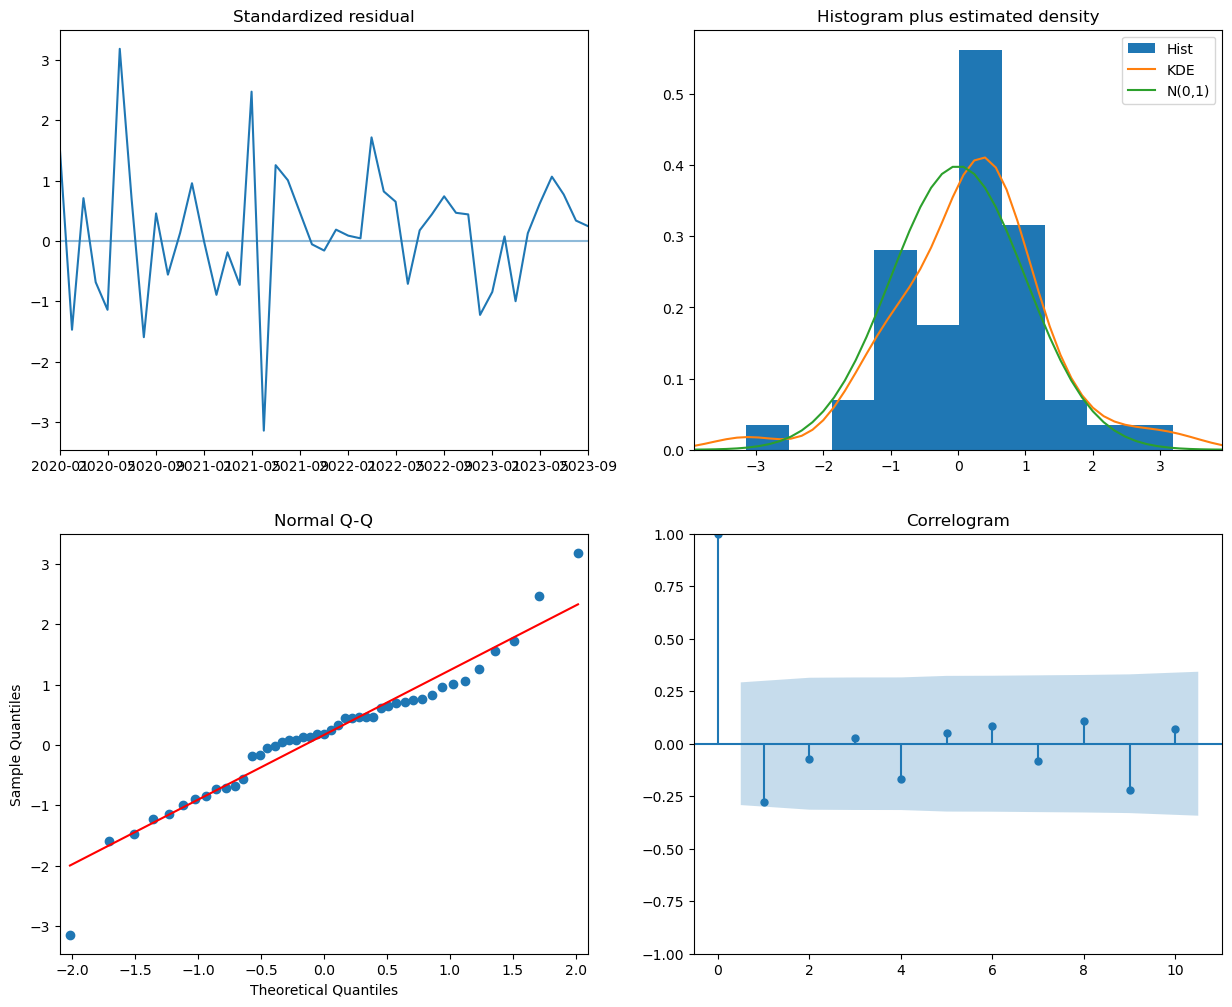

In [40]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [41]:
forecast_test_auto= auto_arima.predict(n_periods=len(test))
sales_k['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_k.plot()

Text(0.5, 1.0, 'Product K')

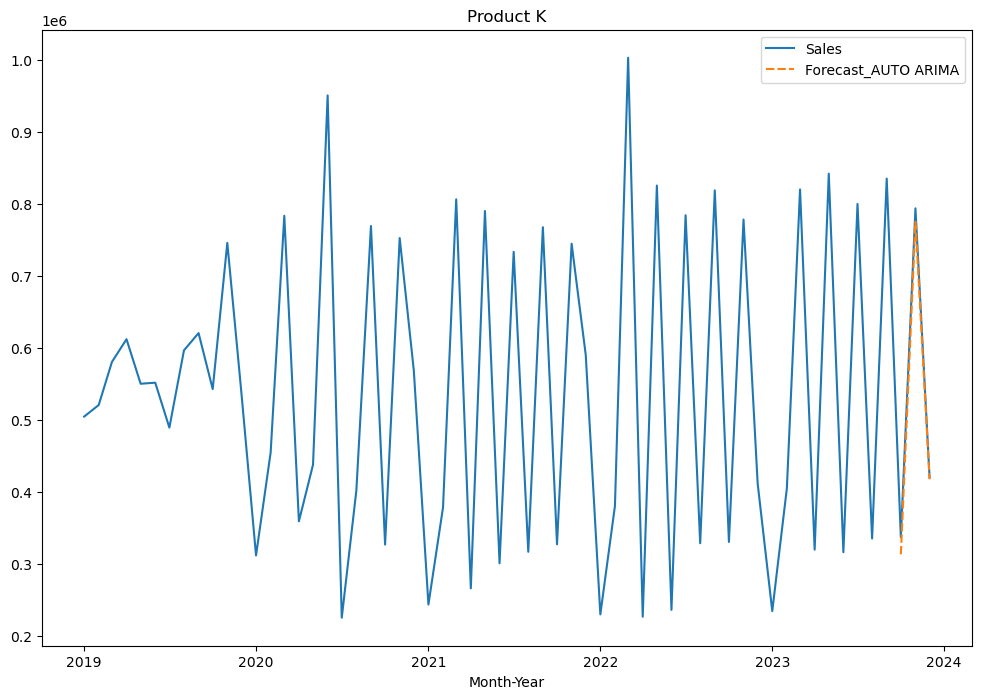

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product K')

In [43]:
mae_auto_arima= mean_absolute_error(test,forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test,forecast_test_auto)
mse_auto_arima=mean_squared_error(test,forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test,forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 15021.995733983815
MAPE - AUTO ARIMA: 0.033347865393015194
MSE - AUTO ARIMA: 307464391.96834123
RMSE - AUTO ARIMA: 17534.662584958434


In [44]:
sales_k.tail(12)

,Sales,Forecast_ARIMA,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,
2023-01-01,234804,NaN,NaN,NaN
2023-02-01,405296,NaN,NaN,NaN
2023-03-01,820679,NaN,NaN,NaN
2023-04-01,320174,NaN,NaN,NaN
2023-05-01,842609,NaN,NaN,NaN
2023-06-01,316593,NaN,NaN,NaN
2023-07-01,800485,NaN,NaN,NaN
2023-08-01,335618,NaN,NaN,NaN
2023-09-01,835745,NaN,NaN,NaN


In [45]:
sales_k.mean()

Sales                  538321.733333
Forecast_ARIMA         450432.833729
Forecast_SARIMA        511830.798539
Forecast_AUTO ARIMA    502408.337599
dtype: float64

In [46]:
data = {
    'model': ['ARIMA', 'AUTO ARIMA', 'SEASONAL ARIMA'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMA,66997.499604,0.140751,4.710207e+09,68630.949204
AUTO ARIMA,15021.995734,0.033348,3.074644e+08,17534.662585
SEASONAL ARIMA,11223.902115,0.023791,1.307490e+08,11434.552849


# TESTING

In [14]:
auto_arima_1= pm.auto_arima(train, start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1220.820, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1221.203, Time=0.08 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1223.184, Time=0.24 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1221.222, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1223.202, Time=0.41 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1223.100, Time=0.34 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1225.001, Time=0.45 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1226.976, Time=0.58 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1208.178, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1209.932, Time=0.24 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1211.632, Time=0.44 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1209.781, Time=0.17 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,0

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [15]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   57
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -594.589
Date:                             Wed, 08 May 2024   AIC                           1199.179
Time:                                     20:28:23   BIC                           1208.212
Sample:                                 01-01-2019   HQIC                          1202.547
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9150.1636   1.39e+04     -0.658      0.511   -3.64e+04    1.81e+04
ma.L1         -0.6681      0.076     -8.768      0.000      -0.817      -0.519
ma.L2          0.2951      0.061      4.826      0.000       0.175       0.415
ar.S.L12      -0.0831      0.038     -2.171      0.030      -0.158      -0.008
sigma2      1.473e+10      0.014   1.08e+12      0.000    1.47e+10    1.47e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.76   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.05   Prob(JB):                         0.08
Heteroskedasticity (H):               0.30   Skew:                            -0.12
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+28. Standard errors may be unstable.
"""

In [16]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test))
sales_k['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product K')

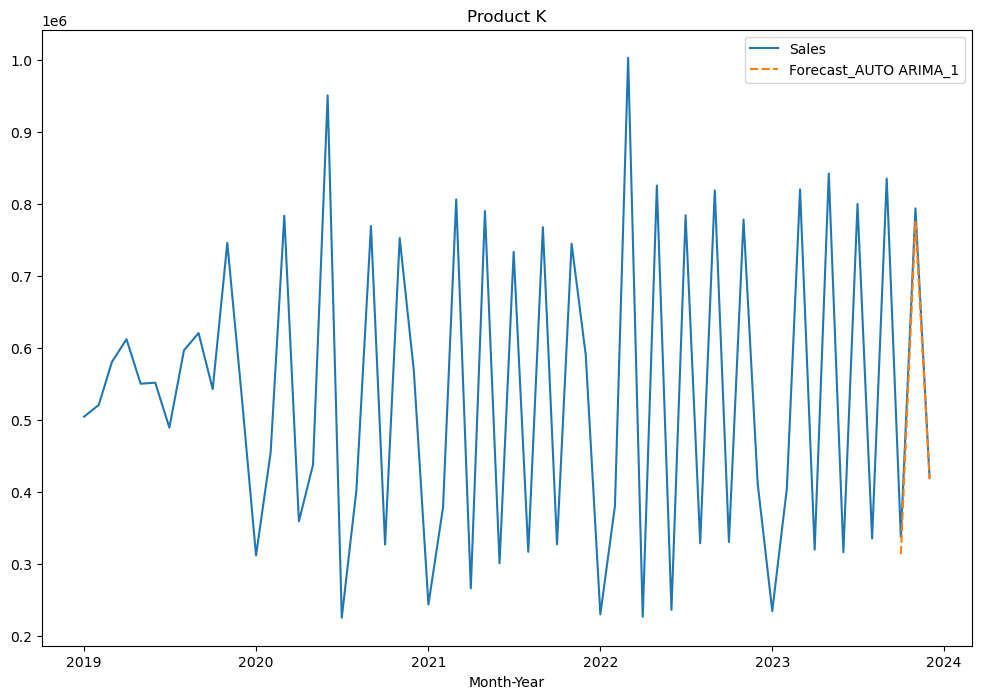

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product K')

In [18]:
mae_auto_arima_1= mean_absolute_error(test,forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test,forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test,forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test,forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 15021.995733983815
MAPE - AUTO ARIMA: 0.033347865393015194
MSE - AUTO ARIMA: 307464391.96834123
RMSE - AUTO ARIMA: 17534.662584958434
